In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [46]:
# The original dataset had a minor problem,the dataset was fixed in the Notepad and Excel
df = pd.read_csv('G_Site.csv',encoding='cp1252', na_values = ["?"])



In [47]:
df.head()

,number,Link,Languages,Types,Crypto Currencies,Other Payments,Community,~AutoDice speed (~10 sec),Global Rank,19-Mar,...,19-Jun,19-Jul,19-Aug,19-Sep,19-Oct,19-Nov,19-Dec,20-Jan,20-Feb,"Month change,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,1.0,bet365.com,"EN, ES, DE. IT, PT, DK, SV, NO, CN, BG, GR, PL...","Casino, Live Casino, Sports, Other",NaN,"VISA, Maestro, Mastercard, PayPal, PaySafeCard...",NaN,-,114.0,264 800 000,...,241 100 000,237 400 000,262 600 000,281 900 000,293 500 000,297 100 000,309 700 000,282 100 000,317 000 000,"12,37%,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
1,2.0,caliente.mx,ES,"Casino, Live Casino, Sports, Other",NaN,"VISA, Bank Transfer, PaySafeCard, Dinero Mail,...",NaN,-,408.0,113 400 000,...,101 000 000,103 000 000,71 870 000,69 200 000,74 220 000,74 300 000,123 500 000,168 500 000,115 800 000,"-31,28%,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
2,3.0,verajohn.com,"EN, JP, NO, FI, DE, ES, PT","Casino, Live Casino, Other",NaN,"EcoPayz, Neteller, VISA, Mastercard, Maestro, ...",NaN,-,756.0,12 080 000,...,25 310 000,43 300 000,39 250 000,43 230 000,60 560 000,62 610 000,66 780 000,89 320 000,79 750 000,"-10,71%,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
3,4.0,pch.com,EN,"Casino, Other",NaN,"VISA, Mastercard, Discover",NaN,-,195.0,89 740 000,...,81 470 000,85 360 000,77 020 000,74 160 000,74 920 000,69 370 000,73 360 000,84 210 000,71 970 000,"-14,54%,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
4,5.0,freebitco.in,EN,"Dice, Sport, Other",BTC,NaN,NaN,39,1959.0,51 060 000,...,57 080 000,57 490 000,58 910 000,55 890 000,58 930 000,54 140 000,59 970 000,63 200 000,55 160 000,"-12,72%,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."


In [48]:
# To prepare the individual language variables from the langauges column
df['EN'] = df.Languages.apply(lambda x: 1 if 'EN' in str(x) else 0)
df['ES'] = df.Languages.apply(lambda x: 1 if 'ES' in str(x) else 0)
df['FR'] = df.Languages.apply(lambda x: 1 if 'FR' in str(x) else 0)
df['KR'] = df.Languages.apply(lambda x: 1 if 'KR' in str(x) else 0)
df['PT'] = df.Languages.apply(lambda x: 1 if 'PT' in str(x) else 0)
df['RU'] = df.Languages.apply(lambda x: 1 if 'RU' in str(x) else 0)


In [50]:
#To prepare the individual gambling types that are served by each side
df['Casino'] = df.Types.apply(lambda x: 1 if 'Casino' in str(x) else 0)
df['Live Casino'] = df.Types.apply(lambda x: 1 if 'Live Casino' in str(x) else 0)
df['Sports'] = df.Types.apply(lambda x: 1 if 'Sports' in str(x) else 0)
df['E-Sports'] = df.Types.apply(lambda x: 1 if 'E-Sports' in str(x) else 0)
df['Other'] = df.Types.apply(lambda x: 1 if 'Other' in str(x) else 0)

In [52]:
#Counting amount of languages and type of gambling in substrings
df['num_lang']=df.Languages.str.split().str.len()
df['num_type']=df.Types.str.split().str.len()


<AxesSubplot:>

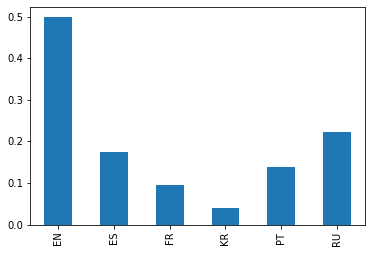

In [53]:
#PLotting to see which language is most frequent
df[['EN','ES','FR','KR','PT','RU']].mean().plot.bar()

In [32]:
print('mean: ', df.num_lang.mean())
print('std: ', df.num_lang.std())

mean:  4.835820895522388
std:  6.132857433407983


The chart shows tht English is the most frequent langauge on the sites, followed by Russia, Spanish, and ecetera. the mean for the number of languages are 4.85(standard deviation = 6.13)

<AxesSubplot:>

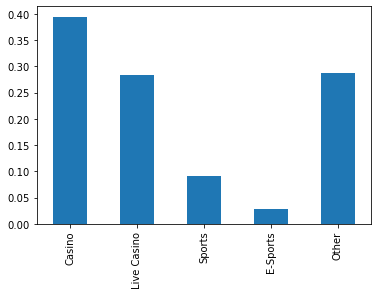

In [33]:
#Plotting to see which gambling type is most frequent
df[['Casino','Live Casino','Sports','E-Sports','Other']].mean().plot.bar()

In [34]:
print('mean: ', df.num_type.mean())
print('std: ', df.num_type.std())

mean:  2.8529411764705883
std:  1.522811297687934


The graph reveals to us that Casino is the most frequent type of gamble followed by a tie with Live Casino and Others. The mean for the types of gambling is 2.85(tandard deviation = 1.52)

##To build logistic regression model to predict site rank with independent variables of number of gamle type, nmuber of language provided, and criptocurrency as payment.##


In [54]:
#to prepare a binary dependant variable of the rank (1 if rank<1000, else 0)
df['Global Rank']=df['Global Rank'].apply(lambda x: 1000000 if pd.isnull(x) else x )

df['Rank2'] = df['Global Rank'].apply(lambda x: 1 if x<100000 else 0)

In [56]:
df.Rank2.value_counts()

0    206
1     45
Name: Rank2, dtype: int64

In [57]:
#to prepare a binary variable for crypto payments (1 if crypto is accepted, else 0)
df['Crypto2']=df['Crypto Currencies'].apply(lambda x: 0 if pd.isnull(x) else 1 )

In [58]:
df.Crypto2.value_counts()

0    145
1    106
Name: Crypto2, dtype: int64

In [62]:
data=df[['Rank2','Crypto2','num_lang','num_type']]
data.dropna(inplace=True)
y_data = data['Rank2']
x_data = data[['Crypto2','num_lang','num_type']]



print(x_data.shape)
print(y_data.shape)

(134, 3)
(134,)


C:\Users\c4uj1\AppData\Local\Temp\ipykernel_20736\744788967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [71]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_data, y_data)


LogisticRegression()

In [73]:
#display regression coefficients and R-squared value of model
print(log.intercept_, log.coef_, log.score(x_data,y_data))

[0.47073783] [[-1.04538535e-05 -2.49476817e+00  3.96178600e-02  1.67019547e-01]] 0.8283582089552238


In [75]:
#Ordinary logistic regression


import statsmodels.api as sm



#add constant to predictor variables
x_data = sm.add_constant(x_data)

#fit linear regression model
model = sm.OLS(y_data, x_data).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rank2   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     24.77
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           9.68e-13
Time:                        12:58:22   Log-Likelihood:                -59.323
No. Observations:                 134   AIC:                             126.6
Df Residuals:                     130   BIC:                             138.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7223      0.098      7.406      0.0

The logistic regression shows that crypto currency and the global rank of sites were negatively associated with each other: high ranked sites are more likely to accept cryto as a form of payment. The # of languages and the # of gambling types were not associated with the global ranking.